In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%cd -q ../scripts/
from default_param import *

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


#  FLE_histogram



In [2]:
%run experiment_fle.py

Sequence results/FLE-dot-anim.mp4 already exists (remove to recompute)
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}
Sequence results/FLE-flash-anim.mp4 already exists (remove to recompute)
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}
Studying CONDENSATION by changing image along variable(s) : {'latency': [0, 10]}


## x-t histograms of the results

First showing the histogram of detected positions for both stimuli:

In [3]:
v_hist = {}
time = np.linspace(0, 1, N_frame)
for i, stimulus_tag in enumerate(stim_labels):
    particles = image[stimulus_tag]['result']['MBP'][10].copy()
    v_hist[stimulus_tag], x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant_X, N_quant_Y=1, display=False)
    v_hist[stimulus_tag] /= np.sum(v_hist[stimulus_tag], axis=0)


In [4]:
_, x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=N_quant_Y, display=False)
x_middle = .5*(x_edges[1:] + x_edges[:-1])
print('Position of the middle of the bins =', x_middle)
y_middle = .5*(y_edges[1:] + y_edges[:-1])

Position of the middle of the bins = [-0.98 -0.94 -0.9  -0.86 -0.82 -0.78 -0.74 -0.7  -0.66 -0.62 -0.58 -0.54
 -0.5  -0.46 -0.42 -0.38 -0.34 -0.3  -0.26 -0.22 -0.18 -0.14 -0.1  -0.06
 -0.02  0.02  0.06  0.1   0.14  0.18  0.22  0.26  0.3   0.34  0.38  0.42
  0.46  0.5   0.54  0.58  0.62  0.66  0.7   0.74  0.78  0.82  0.86  0.9
  0.94  0.98]


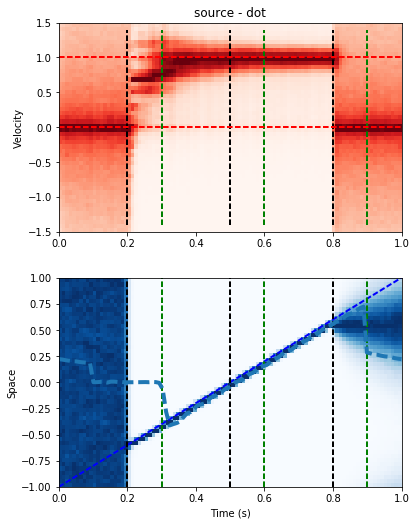

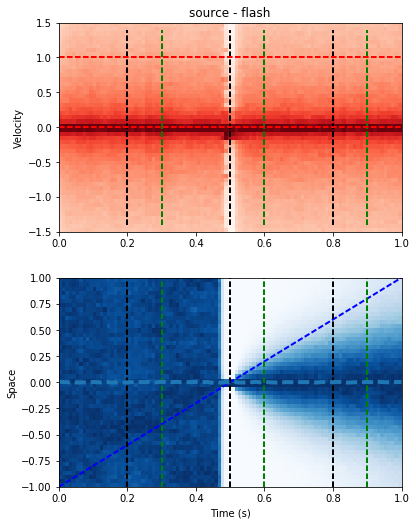

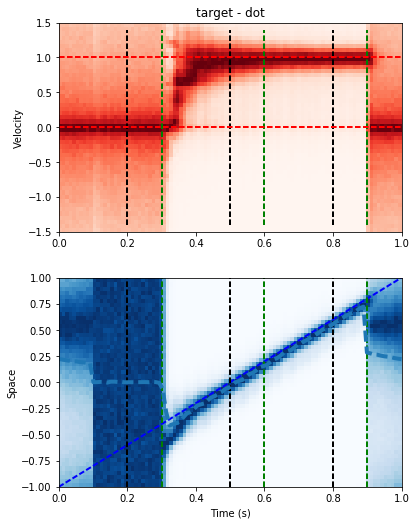

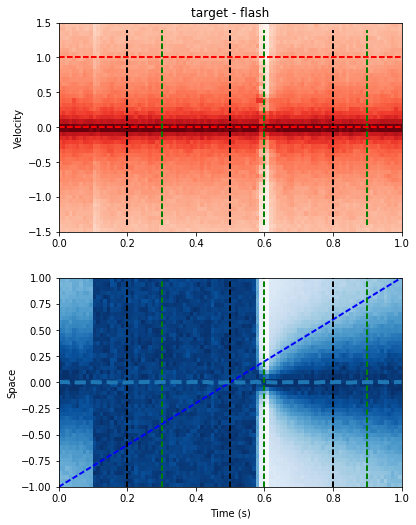

In [5]:
#fig, axs = plt.subplots(1, 2, figsize=(2*fig_width, fig_width /2))
for j, (latency, dlabel) in enumerate(zip(latencies, ['source', 'target'])):
    for i, stimulus_tag in enumerate(stim_labels):
        particles = image[stimulus_tag]['result']['MBP'][latency].copy()  
        fig, axs = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1)#, fig=fig, a=axs[i])
        average_pos = np.sum(v_hist[stimulus_tag]*x_middle[:, np.newaxis], axis=0)
        axs[0].plot(time, average_pos, lw=4, ls='--')
        axs[1].set_title(dlabel + ' - ' + stimulus_tag)


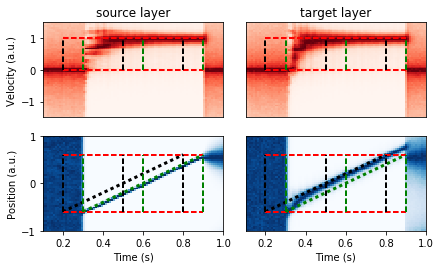

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width, fig_width/1.618))


for ax in axs.ravel(): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    
stimulus_tag = 'dot'
v_hist = {}

for i, (latency, dlabel) in enumerate(zip(latencies, ['source layer', 'target layer'])):
    particles = image[stimulus_tag]['result']['MBP'][latency].copy()
    if latency is 0:
        particles = np.roll(particles, 10, axis=-1)

    v_hist[latency], x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1, display=False)
    v_hist[latency] /= np.sum(v_hist[latency])
    v_hist[latency] /= v_hist[latency].max(axis=0)[np.newaxis, :]

    Time, X = np.meshgrid(np.linspace(0, 1, N_frame), x_edges)
    axs[1][i].pcolormesh(Time[:, 10:], X[:, 10:], v_hist[latency][:, 10:], cmap=plt.cm.Blues, vmin=0., vmax=v_hist[latency].max())#, edgecolor=(1, 1, 1, 1.))

    v_hist_u = np.zeros((N_quant_X, N_frame))
    u_edges = np.linspace(-1.5, 1.5, N_quant_X+1)
    for t in range(N_frame) :
        u = particles[2, :, t]
        weights = particles[4,  :, t]
        v_hist_u[:, t], u_edges_ = np.histogram(u, u_edges, normed=False, weights=weights)

    v_hist_u /= v_hist_u.max(axis=0)[np.newaxis, :]
        
    Time, U = np.meshgrid(np.linspace(0, 1, N_frame), u_edges_)
    axs[0][i].pcolormesh(Time[:, 10:], U[:, 10:], v_hist_u[:, 10:], cmap=plt.cm.Reds, vmin=0., vmax=v_hist_u.max())#, edgecolor=(1, 1, 1, 1.))
    axs[1][i].plot([.2, .8], [-.6, .6], 'k:', lw=3)
    axs[1][i].plot([.3, .9], [-.6, .6], 'g:', lw=3)

    axs[1][i].plot([.2, .9], [-.6, -.6], 'r--', lw=2)
    axs[1][i].plot([.2, .9], [.6, .6], 'r--', lw=2)
    axs[0][i].plot([.2, .9], [0., 0.], 'r--', lw=2)
    axs[0][i].plot([.2, .9], [1., 1.], 'r--', lw=2)
    axs[0][i].set_title(dlabel)
    
    for k, vmin, vmax in zip(range(2), [0., -.6], [1., .6]):
        for c, xs in zip(['k', 'g'], [[.2, .5, .8], [.3, .6, .9]]):
            for x in xs:
                axs[k][i].plot([x, x], [vmin, vmax], ls='--', lw=2, c=c)
                
    for j in [0, 1]:
        axs[j][i].locator_params(axis = 'x', nbins = 6)
        axs[j][i].locator_params(axis = 'y', nbins = 3-2*(j-1)) # HACK  
        axs[j][i].axis('tight')
                      
    plt.setp(axs[0][i], xticks=[])
    plt.setp(axs[0][1], yticks=[])
    plt.setp(axs[1][1], yticks=[])

axs[1][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Velocity (a.u.)')
axs[1][0].set_ylabel('Position (a.u.)')
axs[1][1].set_xlabel('Time (s)')
plt.tight_layout()
for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE_histogram' + ext))

## smoothing

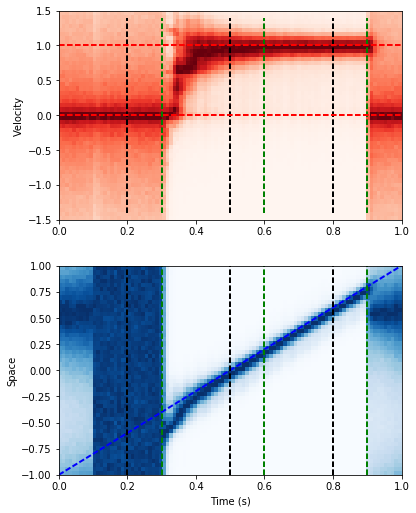

In [7]:
particles = image['dot']['result']['MBP'][10].copy()  
fig, axs = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1)#, fig=fig, a=axs[i])

In [8]:
particles = image['dot']['result']['MBP'][0].copy()  
for i in range(12, 5):
    fig, axs = mp.spatial_readout(mp.push(particles, i,  N_frame=N_frame), N_quant_X=N_quant_Y, N_quant_Y=1)
    fig.show()

## post-prod

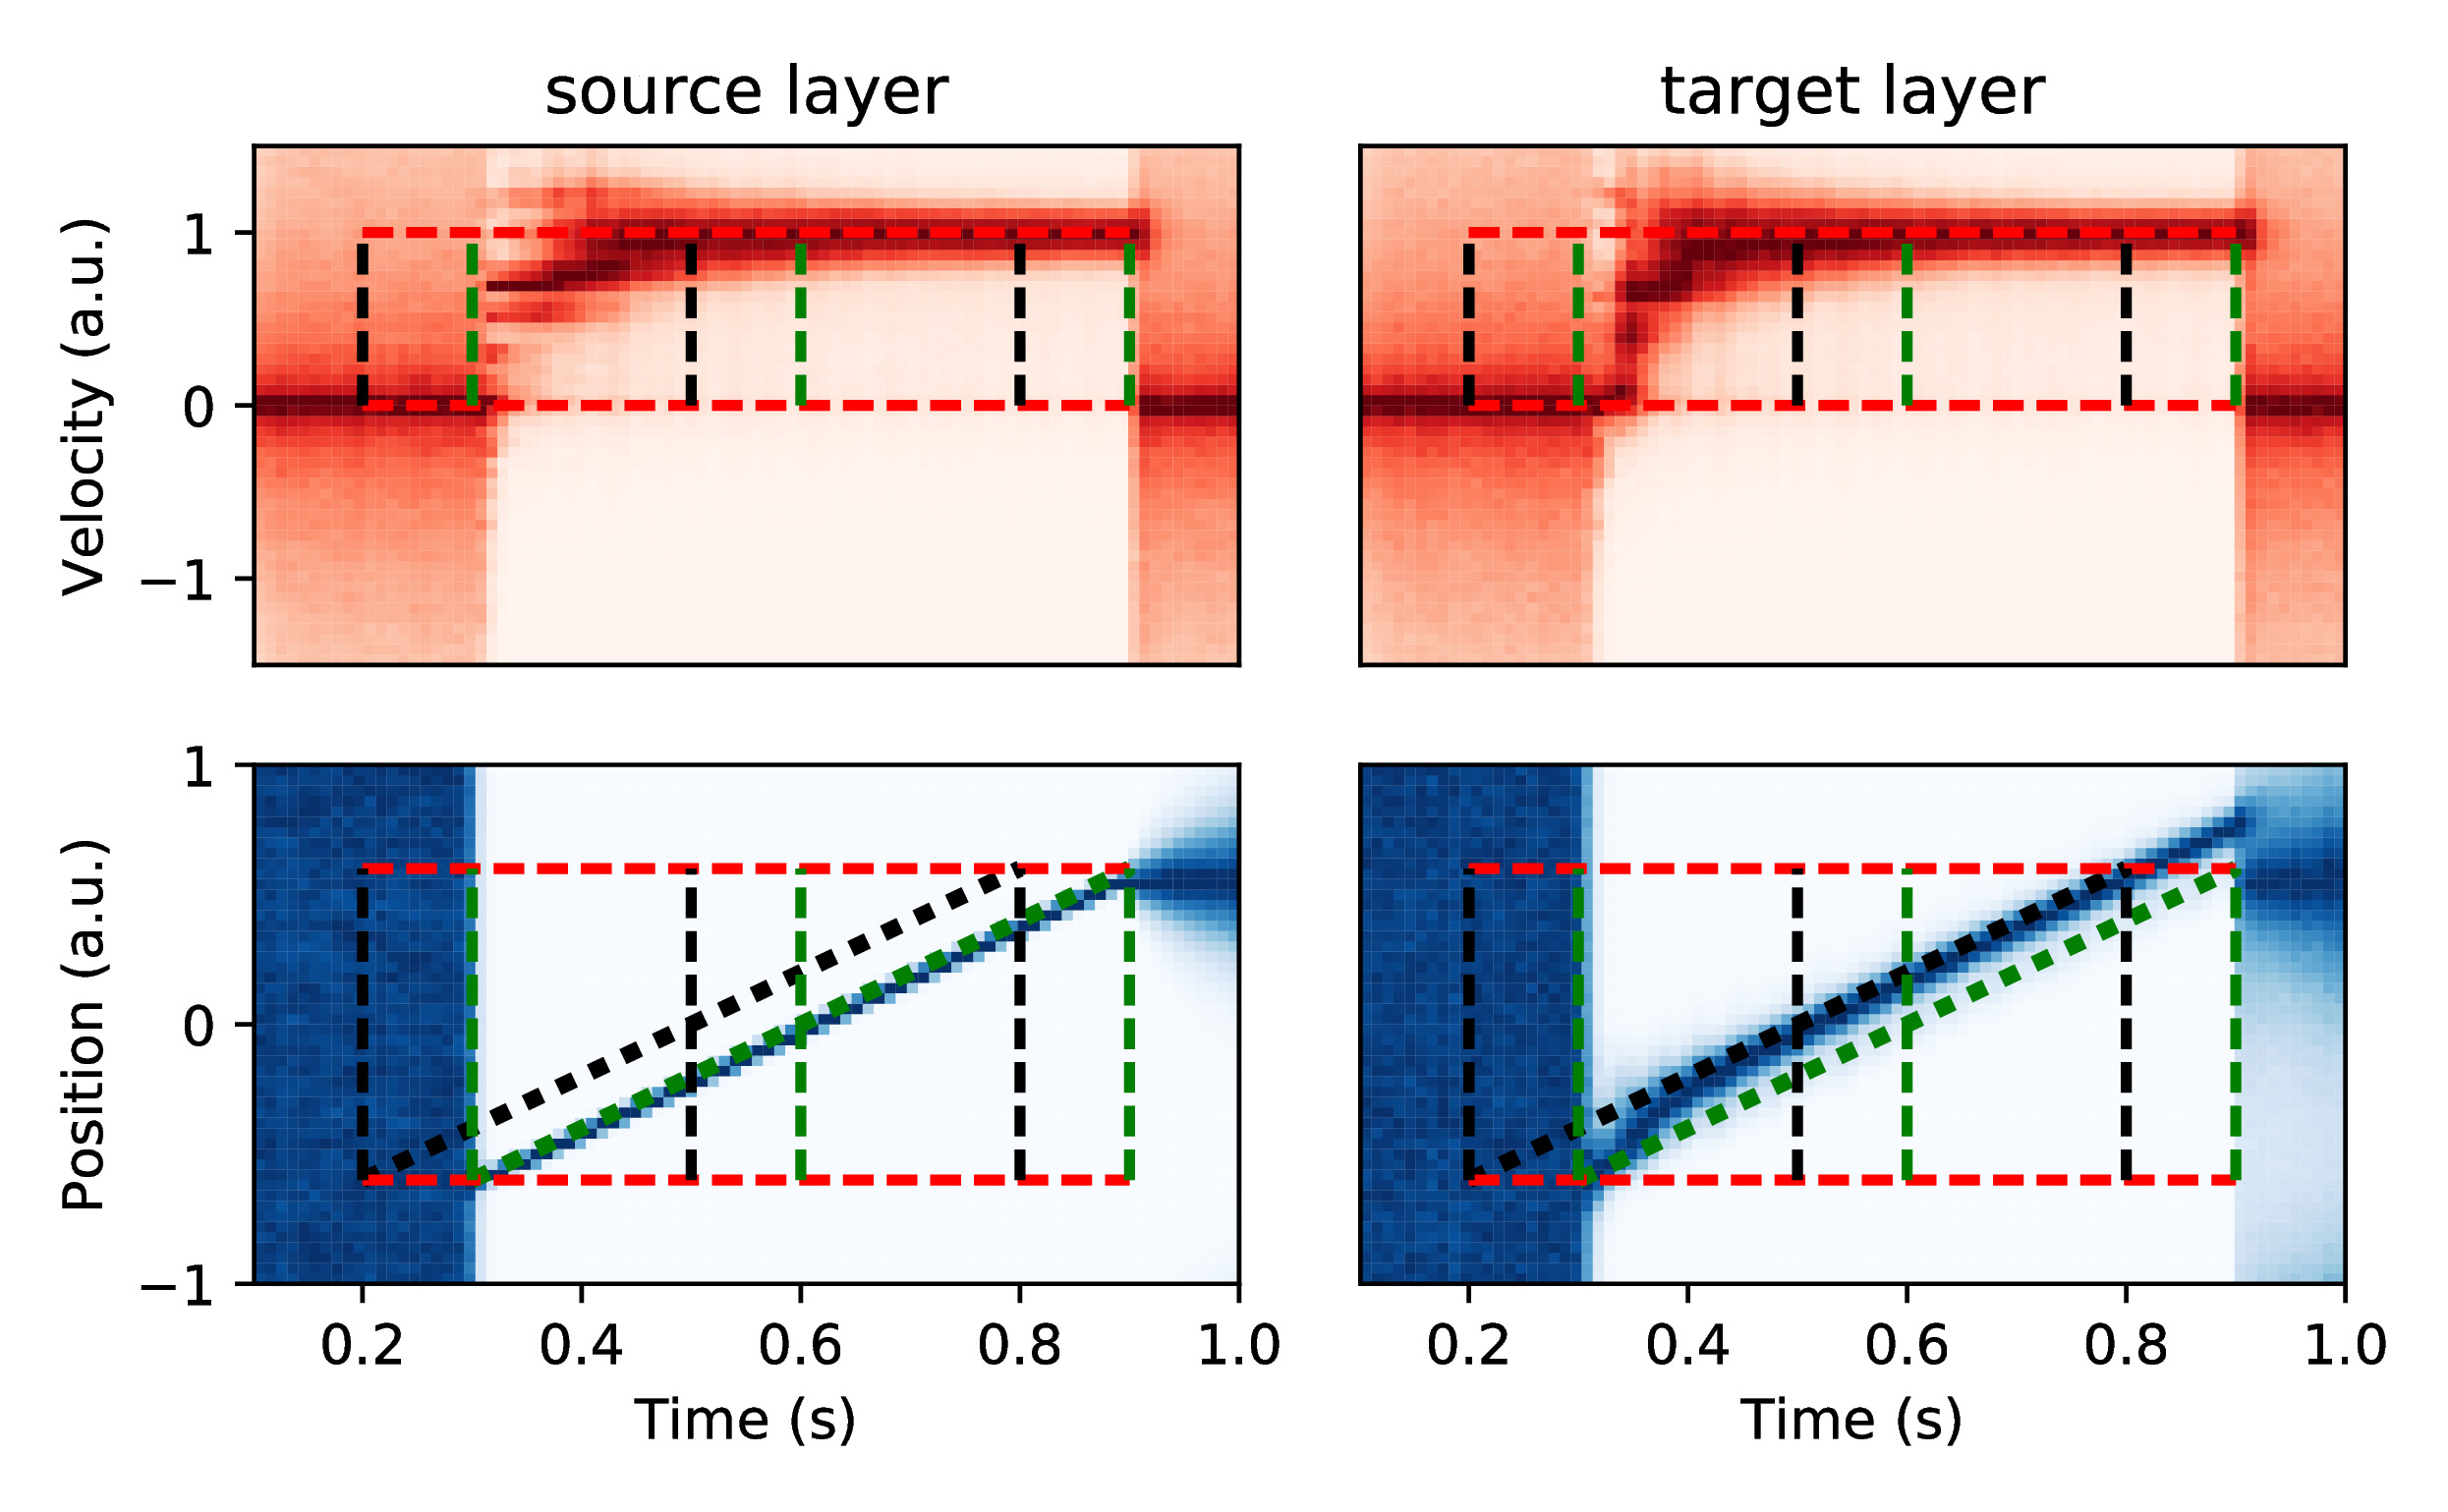

In [9]:
!convert -density 400 ../figures/FLE_histogram.pdf ../figures/FLE_histogram.jpg
!convert  -density 600 -units pixelsperinch -flatten  -compress lzw  -depth 8 ../figures/FLE_histogram.pdf ../figures/FLE_histogram.tiff

from IPython.display import Image
Image('../figures/FLE_histogram.jpg')

## side-by-side comparison

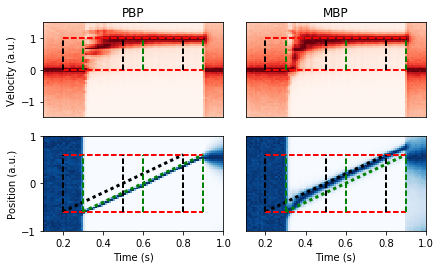

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width, fig_width/1.618))

for ax in axs.ravel(): 
    ax.axis(c='b', lw=2, axisbg='w')
    ax.set_facecolor('w')
    
v_hist = {}

latency = 10
for i, method in enumerate(['PBP', 'MBP']):
    particles_full = np.zeros((5, 0, mp.N_frame))
    for k, (stimulus_tag, cmap, color) in enumerate(zip(stim_labels, [plt.cm.Greens, plt.cm.Reds], ['g', 'r'])):
        particles = image[stimulus_tag]['result'][method][latency].copy()

        if stimulus_tag == 'flash':
            particles[1, ...] = mp.torus(particles[1, ...] + .1, mp.width)
        else:
            particles[1, ...] = mp.torus(particles[1, ...] - .1, mp.width)
        particles_full = np.concatenate((particles_full, particles), axis=1)
    #particles_full = np.roll(particles_full, -latency, axis=-1)
    

stimulus_tag = 'dot'
for i, (latency, dlabel) in enumerate(zip(latencies, ['PBP', 'MBP'])):
    particles = image[stimulus_tag]['result']['MBP'][latency].copy()
    if latency is 0:
        particles = np.roll(particles, 10, axis=-1)



    v_hist[method], x_edges, y_edges = mp.spatial_readout(particles, N_quant_X=N_quant_Y, N_quant_Y=1, display=False)
    v_hist[method] /= np.sum(v_hist[method])
    v_hist[method] /= v_hist[method].max(axis=0)[np.newaxis, :]

    Time, X = np.meshgrid(np.linspace(0, 1, N_frame), x_edges)
    axs[1][i].pcolormesh(Time[:, 10:], X[:, 10:], v_hist[method][:, 10:], cmap=plt.cm.Blues, vmin=0., vmax=v_hist[method].max())#, edgecolor=(1, 1, 1, 1.))

    v_hist_u = np.zeros((N_quant_X, N_frame))
    u_edges = np.linspace(-1.5, 1.5, N_quant_X+1)
    for t in range(N_frame) :
        u = particles[2, :, t]
        weights = particles[4,  :, t]
        v_hist_u[:, t], u_edges_ = np.histogram(u, u_edges, normed=False, weights=weights)

    v_hist_u /= v_hist_u.max(axis=0)[np.newaxis, :]
        
    Time, U = np.meshgrid(np.linspace(0, 1, N_frame), u_edges_)
    axs[0][i].pcolormesh(Time[:, 10:], U[:, 10:], v_hist_u[:, 10:], cmap=plt.cm.Reds, vmin=0., vmax=v_hist_u.max())#, edgecolor=(1, 1, 1, 1.))
    axs[1][i].plot([.2, .8], [-.6, .6], 'k:', lw=3)
    axs[1][i].plot([.3, .9], [-.6, .6], 'g:', lw=3)

    axs[1][i].plot([.2, .9], [-.6, -.6], 'r--', lw=2)
    axs[1][i].plot([.2, .9], [.6, .6], 'r--', lw=2)
    axs[0][i].plot([.2, .9], [0., 0.], 'r--', lw=2)
    axs[0][i].plot([.2, .9], [1., 1.], 'r--', lw=2)
    axs[0][i].set_title(dlabel)
    
    for k, vmin, vmax in zip(range(2), [0., -.6], [1., .6]):
        for c, xs in zip(['k', 'g'], [[.2, .5, .8], [.3, .6, .9]]):
            for x in xs:
                axs[k][i].plot([x, x], [vmin, vmax], ls='--', lw=2, c=c)
                
    for j in [0, 1]:
        axs[j][i].locator_params(axis = 'x', nbins = 6)
        axs[j][i].locator_params(axis = 'y', nbins = 3-2*(j-1)) # HACK  
        axs[j][i].axis('tight')
                      
    plt.setp(axs[0][i], xticks=[])
    plt.setp(axs[0][1], yticks=[])
    plt.setp(axs[1][1], yticks=[])

axs[1][0].set_xlabel('Time (s)')
axs[0][0].set_ylabel('Velocity (a.u.)')
axs[1][0].set_ylabel('Position (a.u.)')
axs[1][1].set_xlabel('Time (s)')
plt.tight_layout()
for ext in FORMATS: fig.savefig(os.path.join('../figures/', 'FLE_histogram_comp' + ext))

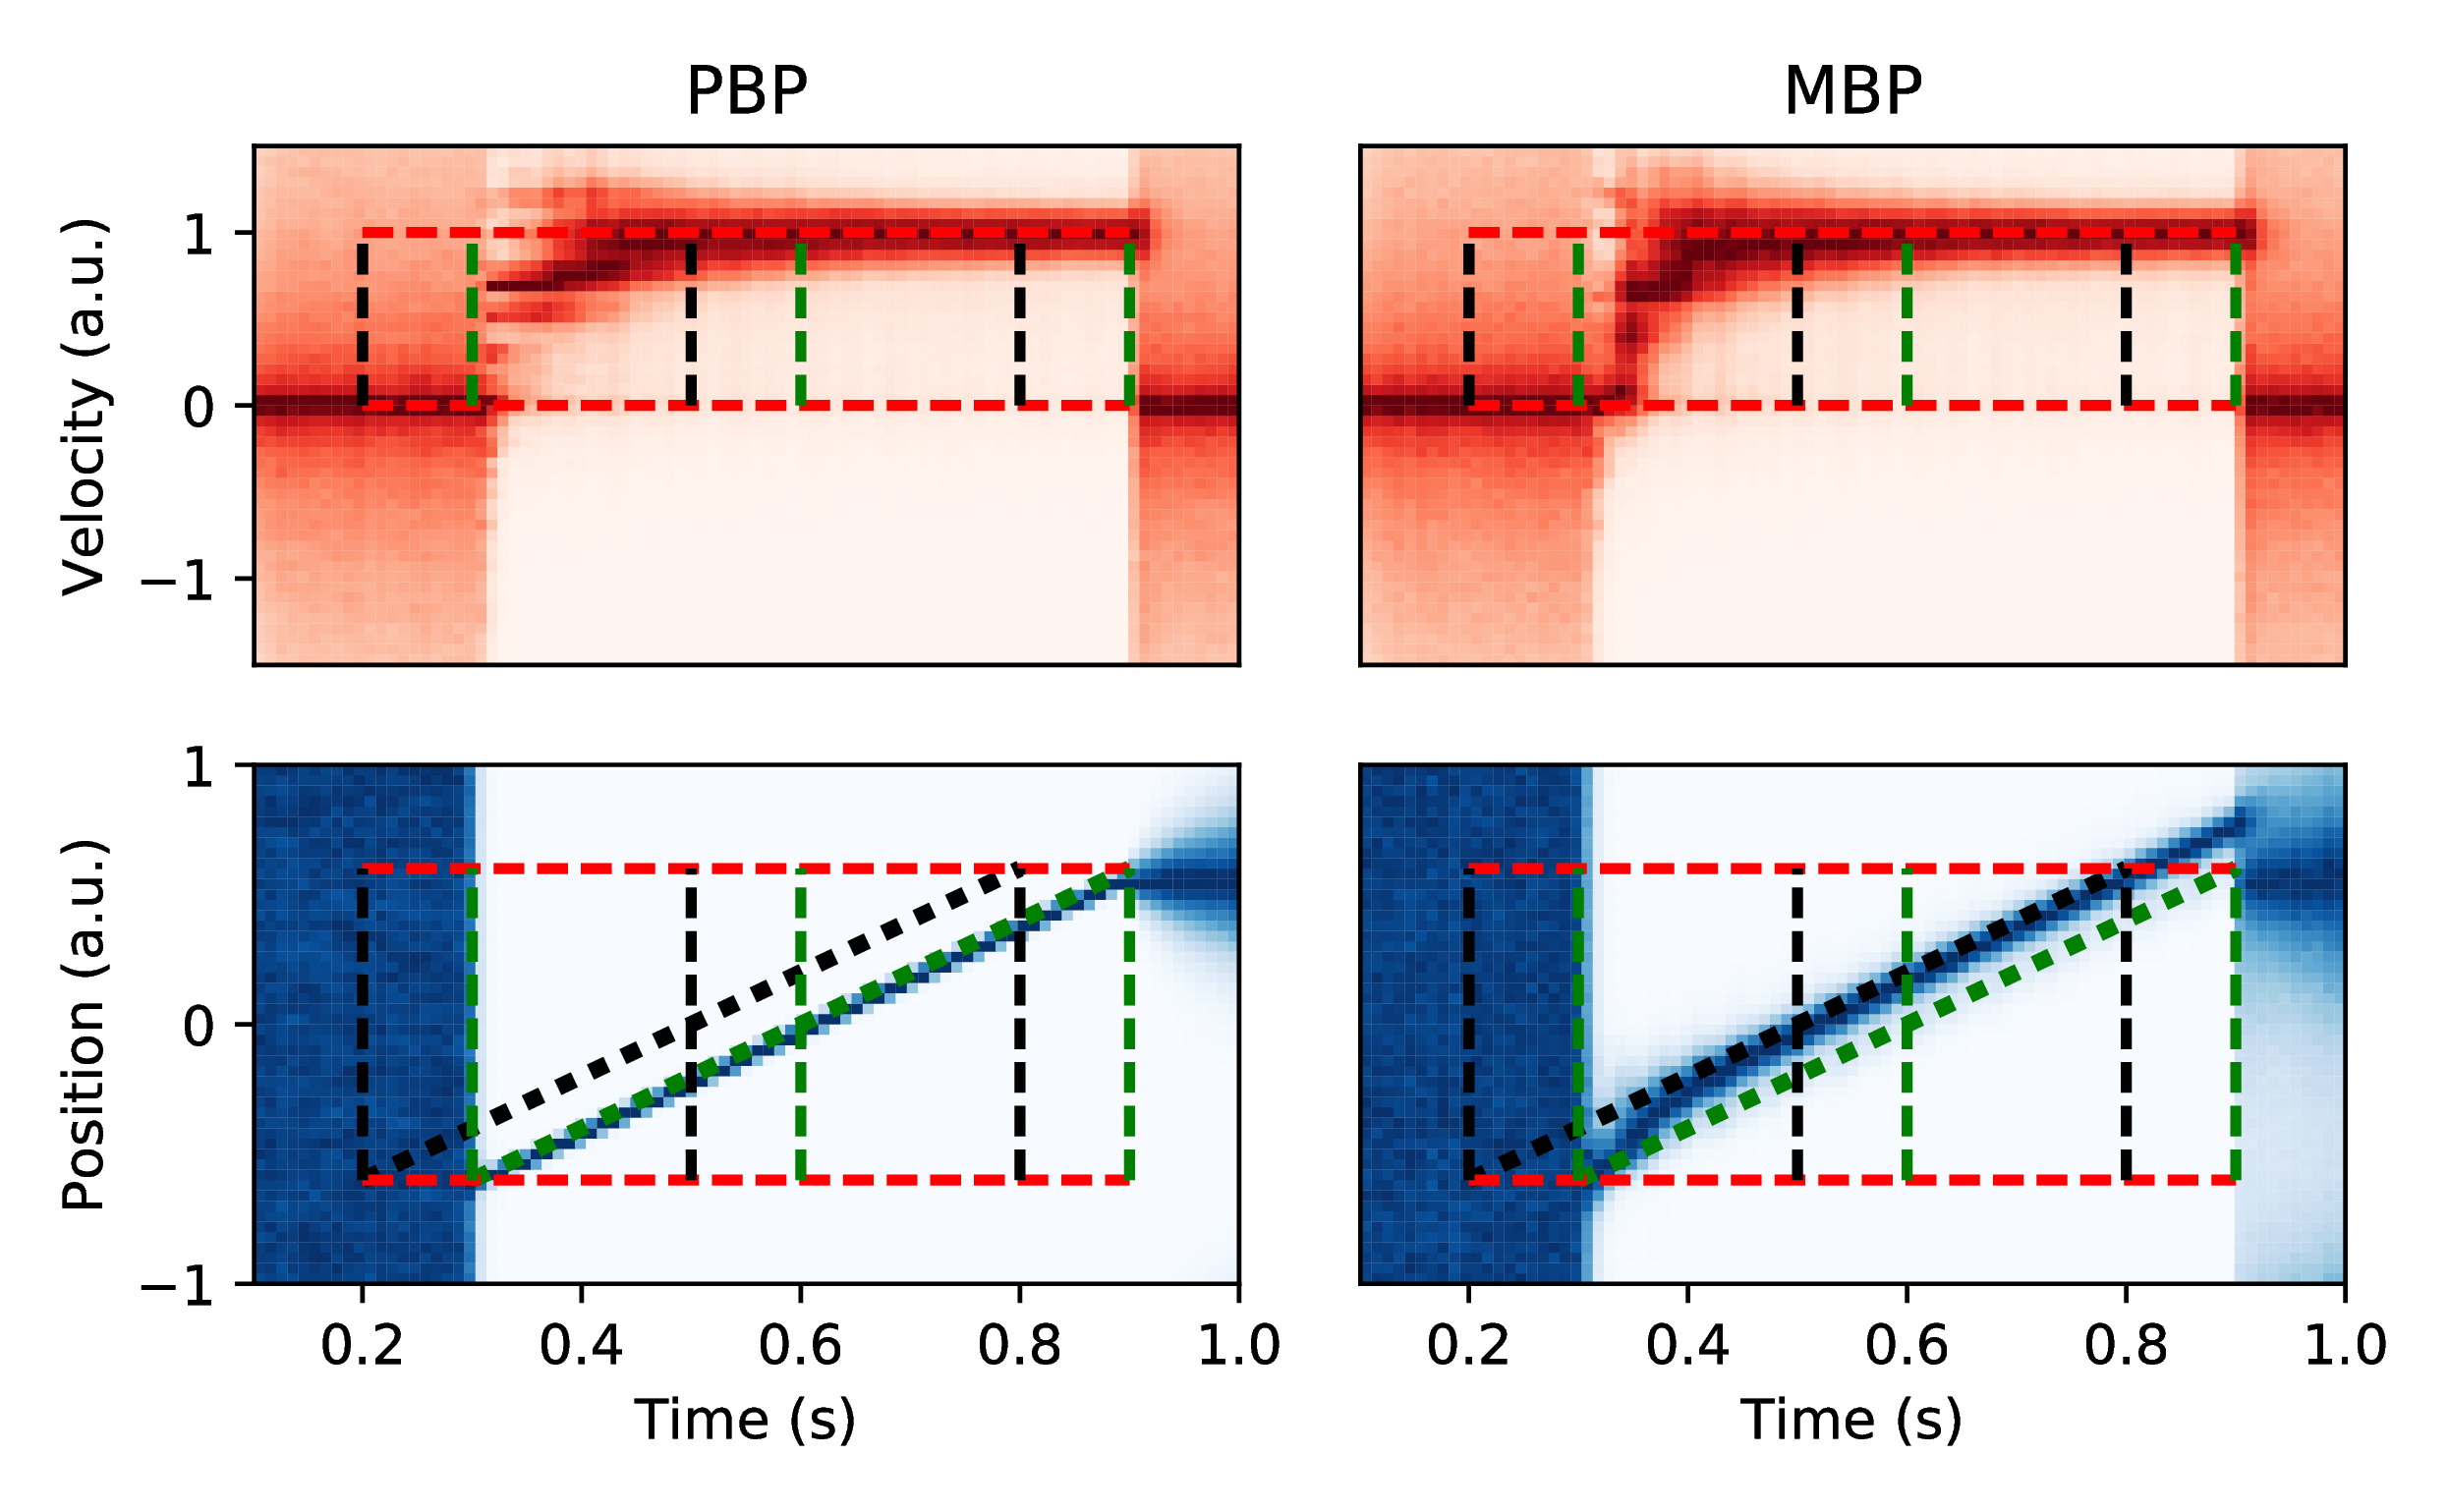

In [11]:
!convert -density 400 ../figures/FLE_histogram_comp.pdf ../figures/FLE_histogram_comp.jpg
!convert  -density 600 -units pixelsperinch -flatten  -compress lzw  -depth 8 ../figures/FLE_histogram_comp.pdf ../figures/FLE_histogram_comp.tiff

from IPython.display import Image
Image('../figures/FLE_histogram_comp.jpg')

## version control

In [14]:
#!git pull
!git status

On branch master
Your branch is ahead of 'origin/master' by 7 commits.
  (use "git push" to publish your local commits)
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   default_param.py
	new file:   experiment_fle.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   ../.gitignore
	modified:   ../figures/FLE-A.pdf
	modified:   ../figures/FLE-A.png
	modified:   ../figures/FLE-B.pdf
	modified:   ../figures/FLE-B.png
	modified:   ../notebooks/SI_controls.ipynb
	modified:   ../notebooks/control_jobs.ipynb
	modified:   ../notebooks/default_parameters.ipynb
	modified:   ../notebooks/figure_2_DiagonalMarkov.ipynb
	modified:   ../notebooks/figure_3_FLE.ipynb
	modified:   ../notebooks/figure_4_FLE_limit_cycles.ipynb
	modified:   ../notebooks/figure_5_FLE_histogram.ipynb
	modified:   ../notebooks/figure_6_MotionReversal.ipynb
	mod

In [13]:
!git commit -m' figure FLE : FLE_histogram'  ../khoei17fle.tex ../figures/FLE_histogram*   ../notebooks/figure_5_FLE_histogram.ipynb 
!# git push

[master 0def99c]  figure FLE : FLE_histogram
 9 files changed, 568 insertions(+), 611 deletions(-)
 rewrite figures/FLE_histogram.jpg (89%)
 rewrite figures/FLE_histogram.pdf (92%)
 rewrite figures/FLE_histogram.png (99%)
 rewrite figures/FLE_histogram.tiff (84%)
 rewrite figures/FLE_histogram_comp.jpg (89%)
 rewrite figures/FLE_histogram_comp.pdf (92%)
 rewrite figures/FLE_histogram_comp.png (99%)
 rewrite figures/FLE_histogram_comp.tiff (85%)
 rewrite notebooks/figure_5_FLE_histogram.ipynb (99%)
